In [10]:
# 导入需要的库
import pandas as pd
import numpy as np
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from instrument_utility import *

plt.style.use('ggplot')

def format_str_code(se):
    return re.sub(r'(^close_hfq_last)', "", str(se)) #替换非数字的字符,去除ETF代码中的特殊字符
def get_weekly_ETF_data_index(path='D:\\Quant_Code\\data\\ETF_weekly\\weekly_ETF_hfq20220113.csv'):
    df_list =list()
    df = pd.read_csv(path)
    # df['code'] = df['code'].apply(lambda x: format_str_code(x))
    cols =['date','code','close_hfq_last']
    _,codes,names = InstrumentUtility().get_ETF_features()
    codes_dict = dict(zip(codes,names))
    
    df_t = df[cols].copy()
    for code in codes:        
        df_s = df_t[df_t['code']==code].copy()
        if df_s.shape[0] >= 52:        
            df_s = df_s.iloc[-52:].copy()
            df_s.set_index(['date','code'],inplace=True)
            df_list.append(df_s)
    df_res =pd.concat(df_list,axis=0)
    df_res = df_res.unstack().copy()
    df_res.columns  = [''.join(col) for col in df_res.columns.values] #把双层索引连接成字符串
    
    df_res.columns = [format_str_code(i) for i in df_res.columns.values] #保留双层索引数字部分
    df_res.columns = [codes_dict[i] for i in df_res.columns.values]
     
    # return df_res.unstack()
    return  df_res

get_weekly_ETF_data_index()

d:\Quant_Code\code_bk\instrument_utility.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['ret'] =(df_t['close_last']/df_t['close_last'].shift(w)-1)    #计算收益率
d:\Quant_Code\code_bk\instrument_utility.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t.sort_values(by=['fee'],ascending=True,inplace=True)


,工银深证红利ETF,大成深证成长40ETF,汇添富中证主要消费ETF,华安创业板50ETF,华夏中证四川国改ETF,华夏创成长ETF,弘毅远方民企领先100ETF,华夏国证半导体芯片ETF,天弘中证电子ETF,招商上证消费80ETF,华夏消费ETF,华宝中证医疗ETF,鹏华中证酒ETF,国泰CES芯片ETF,华夏中证新能源汽车ETF
date,,,,,,,,,,,,,,,
2021-01-17,2.913,1.718,5.315,1.433,1.553,2.826726,2.096,1.406,1.373,10.654000,6.104000,2.799000,2.652000,2.819870,1.839
2021-01-24,2.845,1.638,5.324,1.330,1.557,2.622998,2.008,1.269,1.268,10.304000,6.043000,2.575000,2.678000,2.576850,1.688
2021-01-31,2.980,1.706,5.571,1.377,1.603,2.688482,2.005,1.207,1.208,10.678000,6.228000,2.674000,2.833000,2.461625,1.673
2021-02-07,3.180,1.801,6.025,1.476,1.699,2.870382,2.166,1.270,1.278,11.431000,6.732000,2.821000,3.046000,2.591515,1.774
2021-02-14,3.155,1.710,5.964,1.406,1.752,2.713948,2.133,1.294,1.287,11.046000,6.497000,2.723000,2.919000,2.631320,1.712
2021-02-21,2.882,1.580,5.210,1.241,1.583,2.342872,1.923,1.226,1.211,9.787000,5.683000,2.492081,2.433000,2.476290,1.520
2021-02-28,2.819,1.551,4.990,1.214,1.584,2.291940,1.837,1.231,1.239,9.521000,5.420000,2.404749,2.342000,2.480480,1.533
2021-03-07,2.748,1.492,4.797,1.178,1.547,2.230094,1.748,1.134,1.152,9.210000,5.181000,2.317417,2.269000,2.279360,1.512
2021-03-14,2.701,1.434,4.725,1.128,1.546,2.120954,1.710,1.107,1.110,9.099000,5.120000,2.223847,2.264000,2.220700,1.461


In [6]:
# 导入需要的库
import pandas as pd
import numpy as np
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from instrument_utility import *

plt.style.use('ggplot')



def get_weekly_ETF_data(path='D:\\Quant_Code\\data\\ETF_weekly\\weekly_ETF_hfq20220113.csv'):
    df_list =list()
    df = pd.read_csv(path)
    

    codes,names,_ = InstrumentUtility().get_ETF_SHARP()
    print(codes)
    
    names_dict = dict(zip(codes,names))
    cols =['date','code','close_hfq_last']
    df_t = df[cols].copy()
    print(df_t.head())
    for code in codes:
        df_s = df_t[df_t['code']==code].copy()        
        
        if df_s.shape[0] >= 54:
                   
            df_s = df_s.iloc[-54:].copy()
            df_s.set_index(['date','code'],inplace=True)
            df_list.append(df_s)
    df_res =pd.concat(df_list,axis=0)
    df_res.sort_values('date',ascending=True,inplace=True)
    # df_res = df_res.loc['2021-01-03':]
    df_res = df_res.unstack().copy()
    
    
    cols = [''.join(col) for col in df_res.columns.values] #把双层索引连接成字符串
    codes_cols = [re.sub('(^close_hfq_last)','',i)  for i in cols]
    df_res.columns = [ i +':'+ names_dict[i] for i in codes_cols]
    #df_res.columns = [format_str_code(i) for i in cols] #保留双层索引数字部分
    
    df_res.fillna(method='bfill',inplace=True)
    # df_res.fillna(value=0)
    return df_res

df = get_weekly_ETF_data()
print(df.shape)
df.head()


510050.SH 6533944.1
159901.SZ 769428.2
510180.SH 2209556.4
159902.SZ 99124.0
510880.SH 1816497.3
160119.SZ 784779.2
510010.SH 25162.2
159903.SZ 27091.8
510130.SH 23834.6
510160.SH 27108.7
159905.SZ 357329.7
510150.SH 82496.2
510210.SH 69923.2
510230.SH 417395.1
159908.SZ 61411.7
159910.SZ 44662.1
159916.SZ 45339.9
159915.SZ 1486438.0
510410.SH 40205.7
159919.SZ 2205826.7
510300.SH 5953978.8
510330.SH 2604816.2
511990.SH 14342993.0
510500.SH 5639770.7
159922.SZ 326729.0
511010.SH 79921.6
510310.SH 1012194.4
159925.SZ 189826.6
511880.SH 1153129061.5
510630.SH 42736.2
510510.SH 300211.4
518800.SH 43803.9
518880.SH 1106935.6
159929.SZ 92488.1
159928.SZ 1069338.7
512010.SH 734826.1
159934.SZ 425295.0
512120.SH 21772.2
159936.SZ 21085.0
512070.SH 401887.2
512600.SH 64393.8
512220.SH 28383.2
159937.SZ 806147.8
159003.SZ 54763.7
159001.SZ 334370.3
511800.SH 25764.0
511220.SH 122248.2
511810.SH 351540.0
159938.SZ 201027.4
513600.SH 45383.5
513660.SH 140501.1
159939.SZ 129328.0
512990.SH 40942.9

,159804.SZ:创中盘88ETF,159806.SZ:新能源车ETF,159816.SZ:0-4地债ETF,159901.SZ:深证100ETF易方达,159915.SZ:创业板ETF易方达,159916.SZ:深F60ETF,159928.SZ:消费ETF,159948.SZ:创业板ETF南方,159949.SZ:创业板50ETF,159952.SZ:创业板ETF广发,...,515180.SH:红利ETF易方达,515200.SH:创新100ETF,515210.SH:钢铁ETF,515220.SH:煤炭ETF,515350.SH:民生加银300ETF,515580.SH:科技100ETF,515700.SH:新能车ETF,515780.SH:浦银MSCI中国ETF,515790.SH:光伏ETF,515890.SH:红利ETF博时
date,,,,,,,,,,,,,,,,,,,,,
2021-01-03,1.143,2.287,100.001,8.721229,3.036,6.060,5.647,3.322,1.328,1.829,...,1.160076,2.049,1.272,1.309,6.012,1.739738,2.285,1.555,1.219,1.203
2021-01-10,1.130,2.183,100.401,8.537711,2.990,6.137,5.286,3.267,1.314,1.794,...,1.156935,2.014,1.256,1.261,5.966,1.730729,2.169,1.533,1.167,1.200
2021-01-17,1.137,2.341,100.652,8.901654,3.241,6.118,5.315,3.538,1.433,1.951,...,1.166358,2.136,1.274,1.285,6.090,1.860859,2.347,1.577,1.287,1.205
2021-01-24,1.058,2.151,100.630,8.448014,3.029,5.896,5.324,3.310,1.330,1.819,...,1.119243,1.992,1.229,1.215,5.872,1.714713,2.190,1.523,1.224,1.154
2021-01-31,0.998,2.125,100.720,8.727415,3.084,6.089,5.571,3.373,1.377,1.855,...,1.118196,1.996,1.238,1.177,6.031,1.699698,2.164,1.563,1.202,1.157


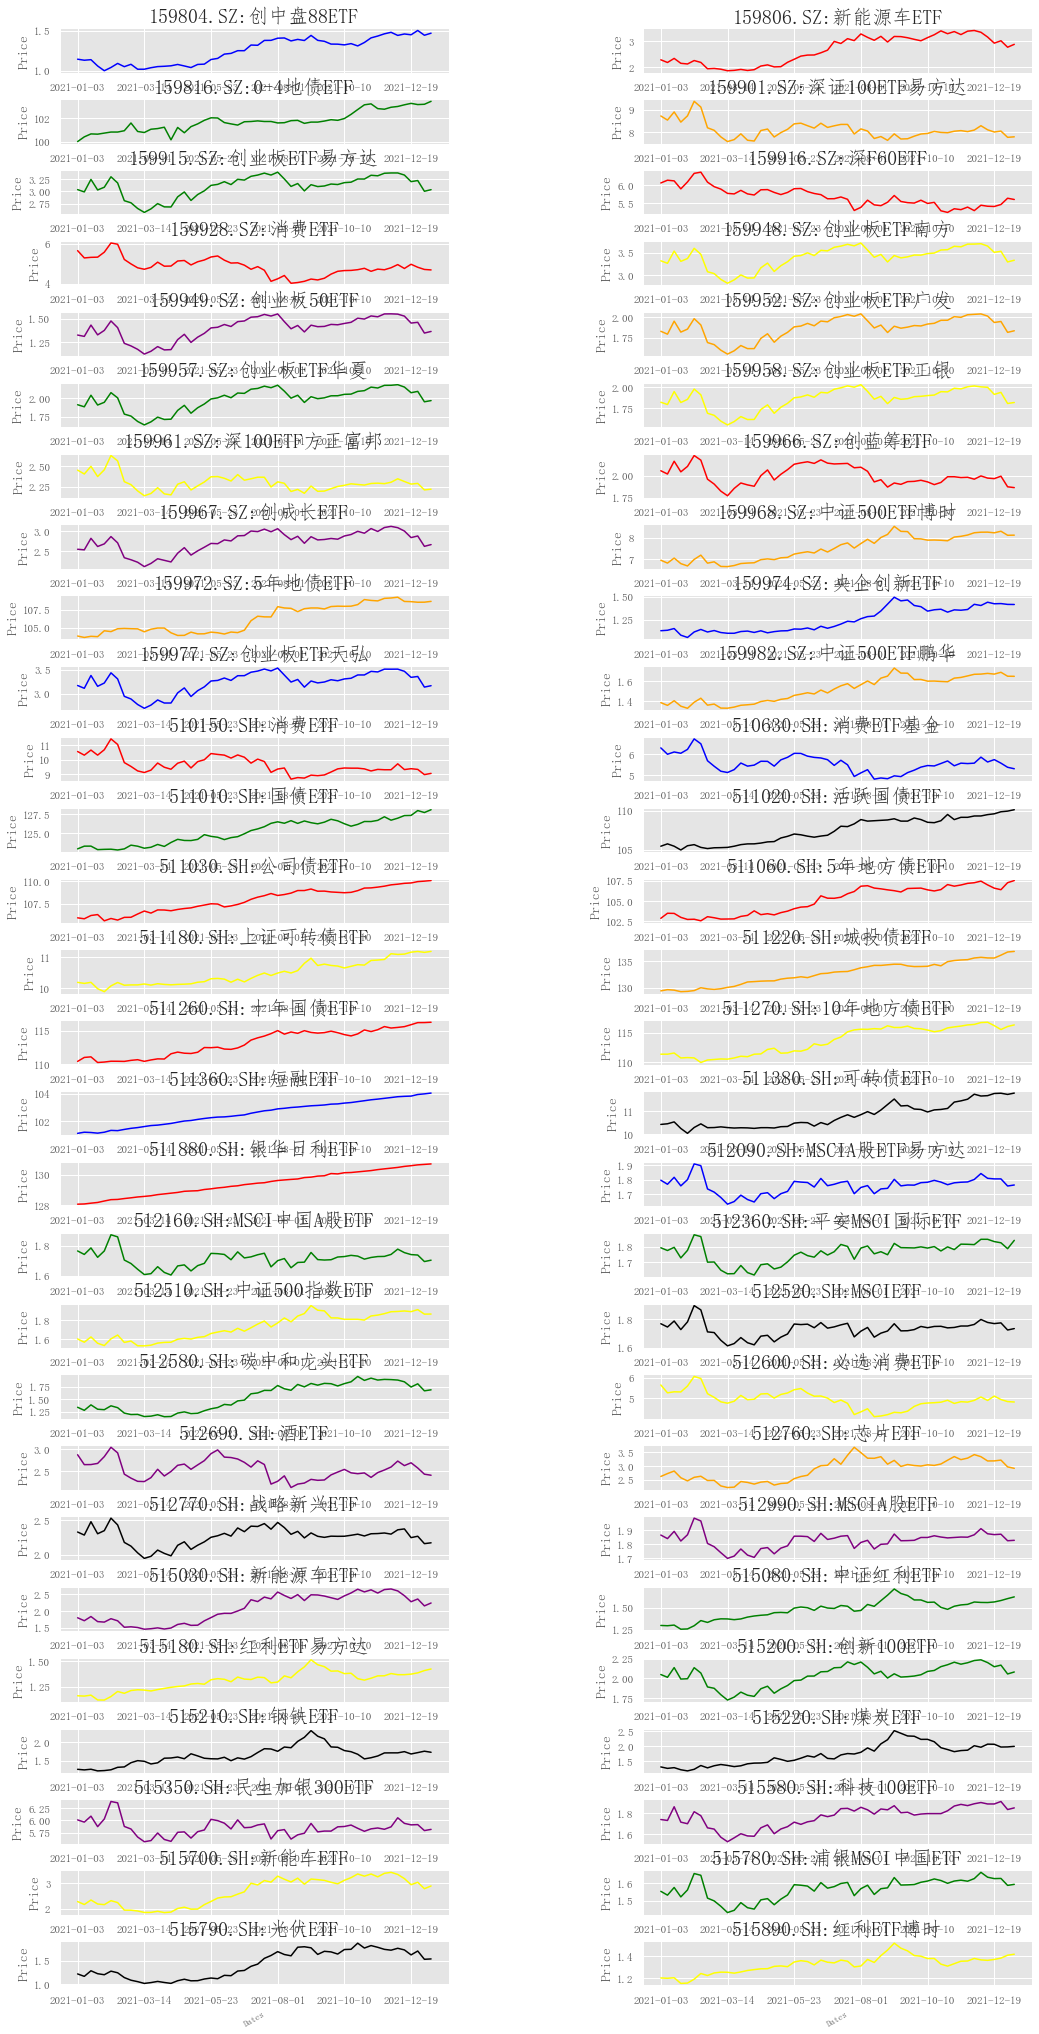

In [7]:
import pylab as mpl     #import matplotlib as mpl
import matplotlib.ticker as ticker
import random 
#设置汉字格式
# sans-serif就是无衬线字体，是一种通用字体族。
# 常见的无衬线字体有 Trebuchet MS, Tahoma, Verdana, Arial, Helvetica,SimHei 中文的幼圆、隶书等等
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


# codes, names = get_ETF_codes()
# code_dict = dict(zip(codes,names))

fig1 =plt.figure(figsize=(20,36))
plt.subplots_adjust(hspace=.6,wspace=.5) # it adds space in between plots

for i in range(0,len(df.columns)):
    plt.subplot(28,2,i+1)
    ax = plt.gca()    
    ax.plot(df[df.columns[i]], color =random.choice(['green','red','blue','yellow','black','purple','orange']))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
    # ax.set_ylim(0,8)
    ax.set_xlabel('Dates',fontsize=9,rotation=30)
    ax.set_ylabel('Price',fontsize =14)
    ax.set_title(df.columns[i],fontsize =20)
    fig1.subplots_adjust(right=0.8)  #把图例往左移动

plt.show()
fig1.savefig('D:\\Quant_Code\\data\\plot_ETF\\prices_sharp_filt.png',dpi=fig1.dpi)



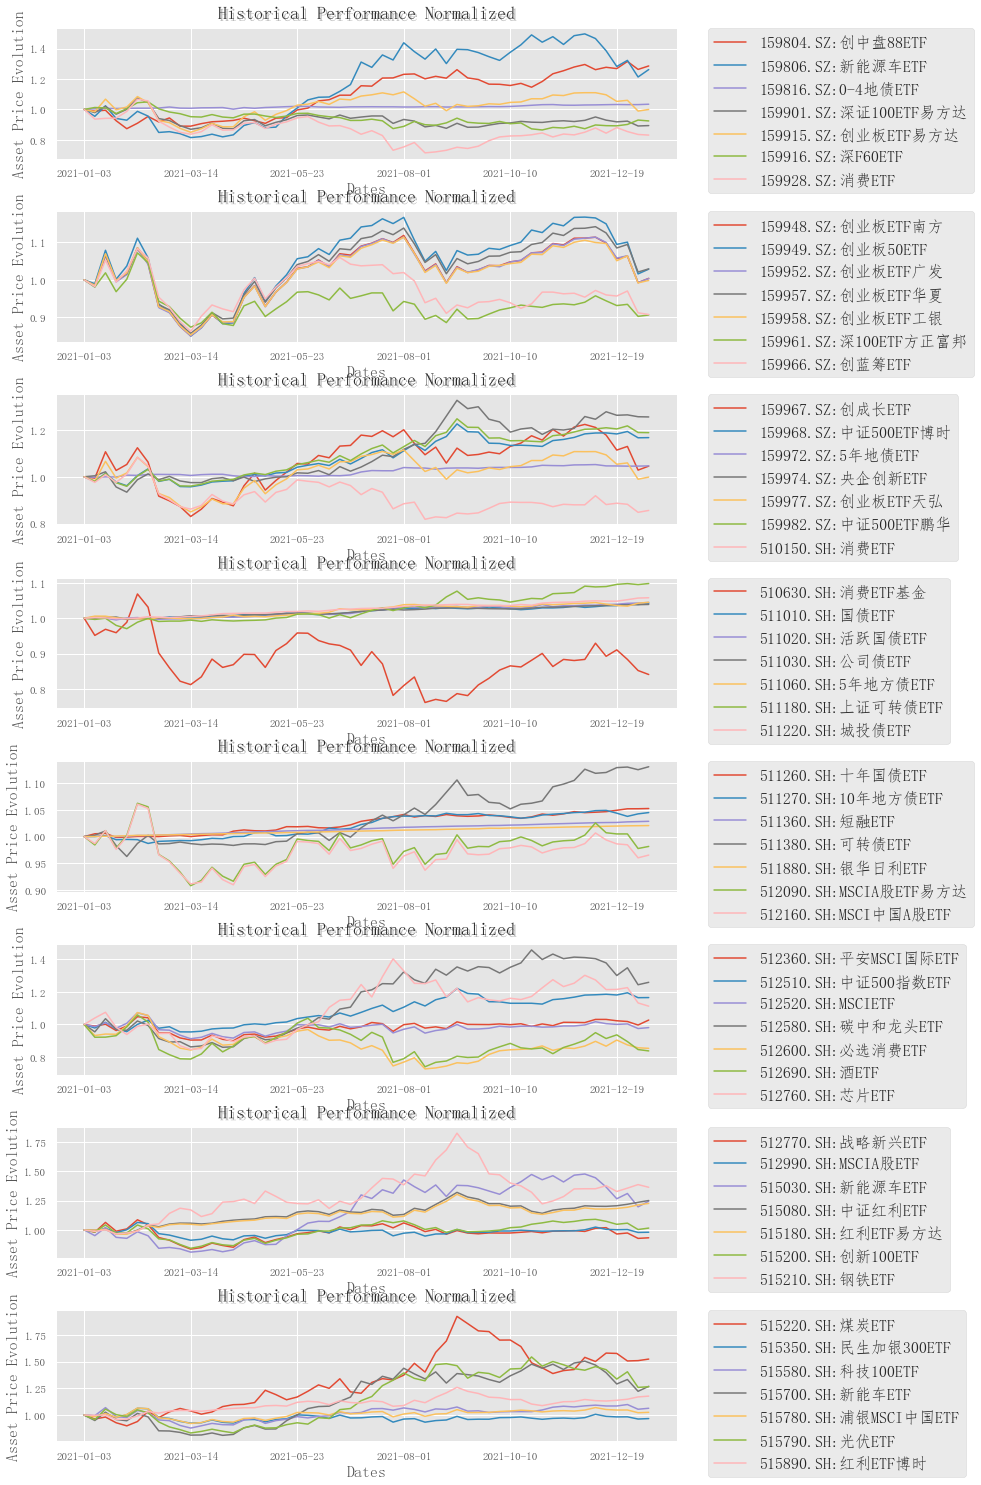

In [8]:
normalized_series = df/df.iloc[0]
normalized_series.head()
from matplotlib import patheffects
fig2 =plt.figure(figsize=(15,26))
plt.subplots_adjust(hspace=.4,wspace=.5) # it adds space in between plots
x = [0,7,14,21,28,35,42,49,56]
for i in range(0,8):
    plt.subplot(8,1,i+1)
    ax = plt.gca()
    ax.plot(normalized_series.iloc[:,x[i]:x[i+1]])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

    title_text_obj = plt.title("Historical Performance Normalized", fontsize = 18,
                            verticalalignment = 'bottom')
    title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
    pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                        alpha = 0.8)
    xlabel_obj = plt.xlabel('Dates', fontsize = 16)
    ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
    
    legend_list = list()
    for i in range(x[i],x[i+1]):
        legend_list.append(df.columns[i])


    plt.legend(legend_list,fontsize = 16, loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.) #把图例放到外面
    fig2.subplots_adjust(right=0.7)  #把图例往左移动
plt.show()
fig2.savefig('D:\\Quant_Code\\data\\plot_ETF\\historical_performance_normalized_sharp_filt.png')

In [9]:
df_returns = np.log(df/df.shift(1))
df_returns.dropna(inplace=True)
df_returns.head()
stats = pd.DataFrame()
stats['Annualized Returns(%)'] =df_returns.mean() * 52 *100
stats['Annualized Volatility(%)'] = df_returns.std() * np.sqrt(52)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']
path = 'D:\\Quant_Code\\data\\sharp_ratio\\sharp_ratio.csv'
stats.to_csv(path,encoding='gbk')

print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')


----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
159804.SZ:创中盘88ETF,24.6859,21.3657,1.1554
159806.SZ:新能源车ETF,22.8581,35.8053,0.6384
159816.SZ:0-4地债ETF,3.29762,2.25433,1.46279
159901.SZ:深证100ETF易方达,-11.0456,22.0247,-0.501511
159915.SZ:创业板ETF易方达,-0.0323219,26.5199,-0.00121878
159916.SZ:深F60ETF,-7.74537,15.1377,-0.51166
159928.SZ:消费ETF,-18.177,30.1736,-0.602413
159948.SZ:创业板ETF南方,0.383198,26.3975,0.0145164
159949.SZ:创业板50ETF,2.76804,29.6011,0.0935114
159952.SZ:创业板ETF广发,0.321332,26.525,0.0121143


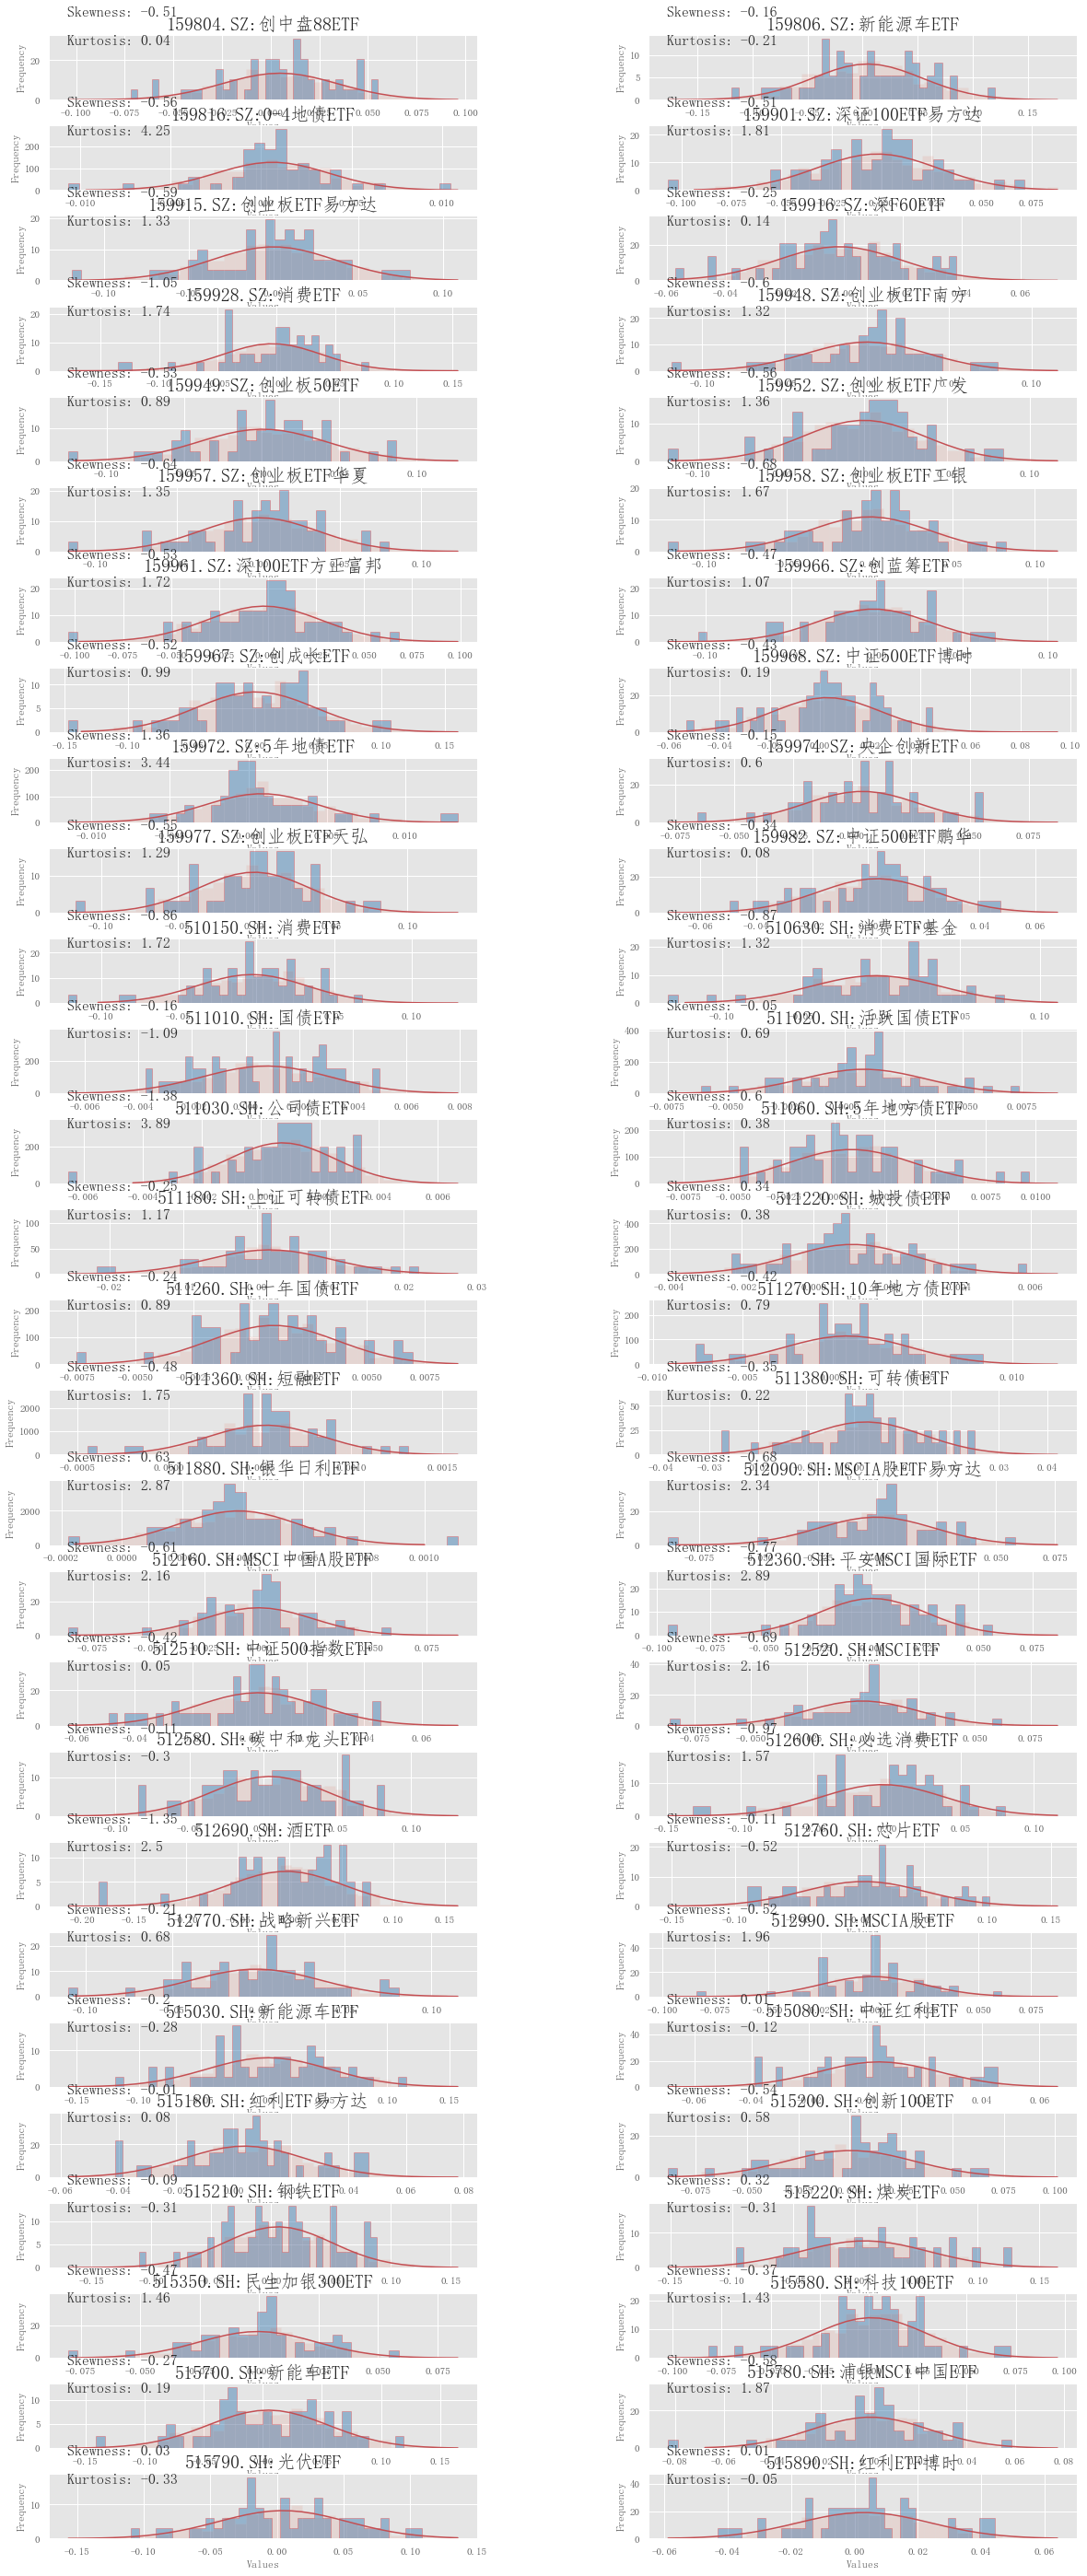

In [10]:
import pylab as mpl     #import matplotlib as mpl
import matplotlib.ticker as ticker
import random 
#设置汉字格式
# sans-serif就是无衬线字体，是一种通用字体族。
# 常见的无衬线字体有 Trebuchet MS, Tahoma, Verdana, Arial, Helvetica,SimHei 中文的幼圆、隶书等等
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

binsnumber = 35


fig3, ax = plt.subplots(figsize=(20,50))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
for i in range(0,len(df.columns)):
    plt.subplot(28,2,i+1)    
    ax = plt.gca()

    ax.hist(df_returns[df_returns.columns[i]], bins=binsnumber, color='steelblue', density = True,
        alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

    sigma, mu = df_returns[df_returns.columns[i]].std(),df_returns[df_returns.columns[i]].mean() # mean and standard deviation
    s = np.random.normal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
    ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

    ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(df_returns[df_returns.columns[i]].skew(),2),round(df_returns[df_returns.columns[i]].kurtosis(),2)),
                xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=16)

    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(df_returns.columns[i],fontsize =20)
plt.show()
fig3.savefig('D:\\Quant_Code\\data\\plot_ETF\\distribution.png')


C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


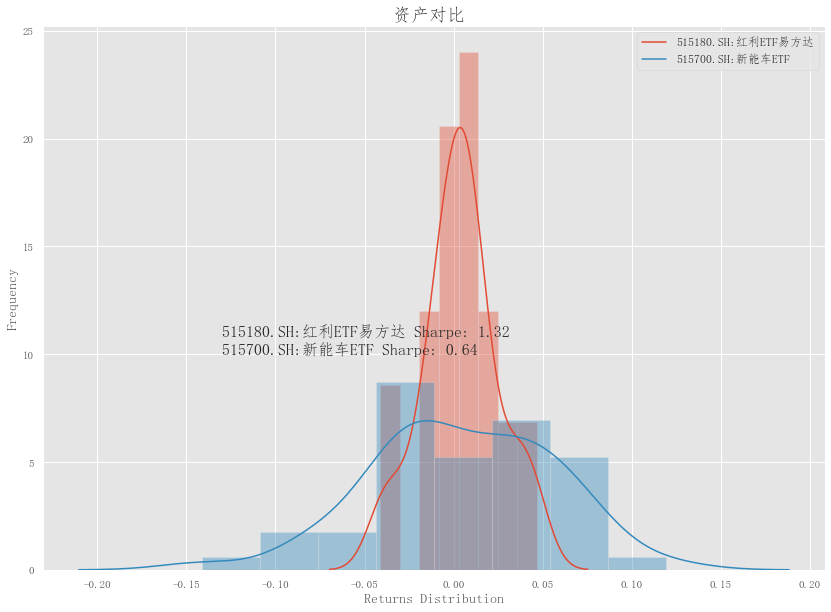

In [11]:

fig4 = plt.figure(figsize=(14,10))
sns.distplot(df_returns['515180.SH:红利ETF易方达'])
sns.distplot(df_returns['515700.SH:新能车ETF'])
plt.legend(('515180.SH:红利ETF易方达','515700.SH:新能车ETF'),fontsize = 12)

# anotate an important value
plt.annotate('515180.SH:红利ETF易方达 Sharpe: {}\n515700.SH:新能车ETF Sharpe: {}'.format(round(stats.loc['515180.SH:红利ETF易方达','Sharpe Ratio'],2),round(stats.loc['515700.SH:新能车ETF','Sharpe Ratio'],2)),
            xy=(-.15,8),xycoords = 'data',xytext =(-.13, 10),fontsize=16)
plt.title('资产对比 ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)
    

C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


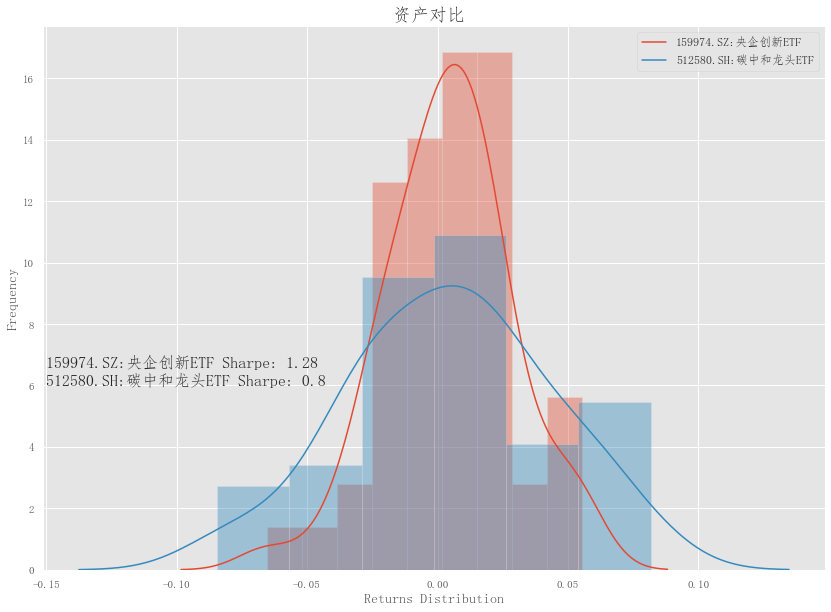

In [12]:
fig5 = plt.figure(figsize=(14,10))
sns.distplot(df_returns['159974.SZ:央企创新ETF'])
sns.distplot(df_returns['512580.SH:碳中和龙头ETF'])

plt.legend(('159974.SZ:央企创新ETF','512580.SH:碳中和龙头ETF'),fontsize = 12)

# anotate an important value
plt.annotate('159974.SZ:央企创新ETF Sharpe: {}\n512580.SH:碳中和龙头ETF Sharpe: {}'.format(round(stats.loc['159974.SZ:央企创新ETF','Sharpe Ratio'],2),
                        round(stats.loc['512580.SH:碳中和龙头ETF','Sharpe Ratio'],2)),
            xy=(-.15,4),xycoords = 'data',xytext =(-.15, 6),fontsize=16)
plt.title('资产对比 ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)

In [13]:
filt = (stats['Sharpe Ratio'] > 0 ) & (stats['Annualized Returns(%)'] > 5.5) 
len(list(stats[filt].index))

20

In [14]:
stats[filt].style.bar(color=['red','green'], align='zero')


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
159804.SZ:创中盘88ETF,24.6859,21.3657,1.1554
159806.SZ:新能源车ETF,22.8581,35.8053,0.6384
159968.SZ:中证500ETF博时,15.1726,15.272,0.993492
159974.SZ:央企创新ETF,22.3277,17.4156,1.28205
159982.SZ:中证500ETF鹏华,16.939,15.2582,1.11016
511180.SH:上证可转债ETF,9.17339,6.05522,1.51496
511220.SH:城投债ETF,5.51937,1.22991,4.48762
511380.SH:可转债ETF,12.0531,8.59693,1.40203
512510.SH:中证500指数ETF,15.0349,15.3996,0.976318
512580.SH:碳中和龙头ETF,22.6368,28.1748,0.80344


In [15]:
cols = ['511220.SH:城投债ETF',
'512580.SH:碳中和龙头ETF','512760.SH:芯片ETF','515180.SH:红利ETF易方达','515210.SH:钢铁ETF',
'515220.SH:煤炭ETF','515580.SH:科技100ETF','515790.SH:光伏ETF']
# cols = list(stats[filt].index)
stats[filt].style.bar(color=['red','green'], align='zero')

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
159804.SZ:创中盘88ETF,24.6859,21.3657,1.1554
159806.SZ:新能源车ETF,22.8581,35.8053,0.6384
159968.SZ:中证500ETF博时,15.1726,15.272,0.993492
159974.SZ:央企创新ETF,22.3277,17.4156,1.28205
159982.SZ:中证500ETF鹏华,16.939,15.2582,1.11016
511180.SH:上证可转债ETF,9.17339,6.05522,1.51496
511220.SH:城投债ETF,5.51937,1.22991,4.48762
511380.SH:可转债ETF,12.0531,8.59693,1.40203
512510.SH:中证500指数ETF,15.0349,15.3996,0.976318
512580.SH:碳中和龙头ETF,22.6368,28.1748,0.80344


In [16]:
df_returns[cols].corr('pearson')

,511220.SH:城投债ETF,512580.SH:碳中和龙头ETF,512760.SH:芯片ETF,515180.SH:红利ETF易方达,515210.SH:钢铁ETF,515220.SH:煤炭ETF,515580.SH:科技100ETF,515790.SH:光伏ETF
511220.SH:城投债ETF,1.000000,-0.080477,0.224853,0.277458,0.035598,0.087343,0.146625,-0.119829
512580.SH:碳中和龙头ETF,-0.080477,1.000000,0.509654,0.149656,0.094497,0.151148,0.722474,0.895087
512760.SH:芯片ETF,0.224853,0.509654,1.000000,0.014785,-0.046993,-0.016679,0.557590,0.508742
515180.SH:红利ETF易方达,0.277458,0.149656,0.014785,1.000000,0.690741,0.755777,0.365383,0.082682
515210.SH:钢铁ETF,0.035598,0.094497,-0.046993,0.690741,1.000000,0.677070,0.045191,0.122020
515220.SH:煤炭ETF,0.087343,0.151148,-0.016679,0.755777,0.677070,1.000000,0.193534,0.126051
515580.SH:科技100ETF,0.146625,0.722474,0.557590,0.365383,0.045191,0.193534,1.000000,0.685926
515790.SH:光伏ETF,-0.119829,0.895087,0.508742,0.082682,0.122020,0.126051,0.685926,1.000000


In [17]:
df_returns[cols]

,511220.SH:城投债ETF,512580.SH:碳中和龙头ETF,512760.SH:芯片ETF,515180.SH:红利ETF易方达,515210.SH:钢铁ETF,515220.SH:煤炭ETF,515580.SH:科技100ETF,515790.SH:光伏ETF
date,,,,,,,,
2021-01-10,0.001772,-0.046556,0.039159,-0.002711,-0.012658,-0.037358,-0.005192,-0.043594
2021-01-17,-0.000708,0.081724,0.033236,0.008112,0.014229,0.018854,0.072496,0.097878
2021-01-24,-0.002212,-0.064683,-0.090123,-0.041234,-0.035961,-0.056015,-0.081792,-0.050190
2021-01-31,0.000418,-0.006936,-0.045746,-0.000936,0.007296,-0.031775,-0.008795,-0.018137
2021-02-07,0.001148,0.057846,0.051421,0.030431,0.016821,0.044045,0.064980,0.062092
2021-02-14,0.004162,-0.027379,0.015243,0.041802,0.051849,0.097525,-0.021194,-0.027747
2021-02-21,-0.001663,-0.084491,-0.060724,-0.014919,0.008261,-0.059243,-0.067022,-0.086427
2021-02-28,-0.000739,-0.023958,0.001691,0.022728,0.081825,0.053326,-0.007260,-0.051247
2021-03-07,0.000947,0.002505,-0.084557,0.006032,0.037868,0.030682,-0.047880,-0.029015


In [18]:
df_returns[cols]
weights = np.random.random(8)
weights /=  np.sum(weights)
index =list(df_returns[cols].columns)
allocation = pd.DataFrame(data=weights,index=index ,columns =['s'])
allocation

,s
511220.SH:城投债ETF,0.154416
512580.SH:碳中和龙头ETF,0.091826
512760.SH:芯片ETF,0.171410
515180.SH:红利ETF易方达,0.076001
515210.SH:钢铁ETF,0.161709
515220.SH:煤炭ETF,0.033429
515580.SH:科技100ETF,0.238424
515790.SH:光伏ETF,0.072786


In [19]:
Expected_Return_s = np.sum(df_returns[cols].mean()* allocation.s)* 52


In [20]:
print('Expected_Return_s:',Expected_Return_s)


Expected_Return_s: 0.15656388155192724


In [22]:
Expected_Std_s = np.sqrt(np.dot(allocation.s.T,np.dot(
                                                        df_returns[cols].cov()*52,
                                                        allocation.s))
                        )

print('Expected_Std_s:',Expected_Std_s)


Expected_Std_s: 0.15767947482239103


In [23]:
Sharpe_s = Expected_Return_s / Expected_Std_s

print('Sharpe_s:',Sharpe_s)


Sharpe_s: 0.9929249303264082


Expected_Return_s: 0.25974935127226984
Expected_Std_s: 0.199638151904489
weights: [0.07850789 0.15664663 0.05245038 0.10305078 0.13935378 0.27190843
 0.03754075 0.16054136]
*****************


Text(0.5, 1.0, 'Monte Carlo Simulation Efficient Frontier with EM')

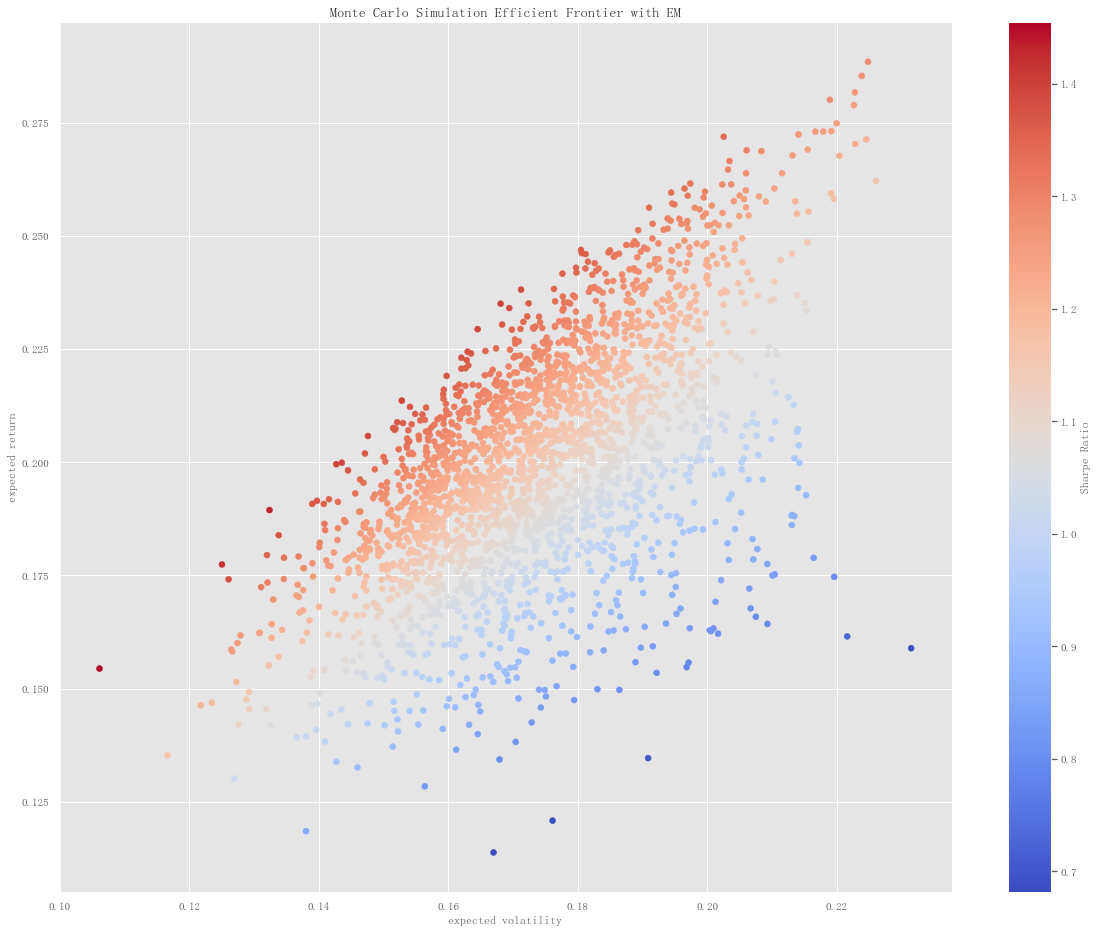

In [36]:
prets = []
pvols = []

for p in range(2500):
    weights = np.random.random(len(allocation))
    weights /= np.sum(weights)
    
    Expected_Return_s = np.sum(df_returns[cols].mean()* weights)* 52
    Expected_Std_s = np.sqrt(np.dot(weights.T,np.dot( df_returns[cols].cov()*52,
                                                        weights))
                        )

    prets.append(Expected_Return_s)
    pvols.append(Expected_Std_s )
    if ((Expected_Return_s > 0.259) & (Expected_Return_s < 0.26)) & ((Expected_Std_s < 0.2 )& (Expected_Std_s > 0.199)):
        print('Expected_Return_s:',Expected_Return_s)
        print('Expected_Std_s:',Expected_Std_s)
        print('weights:',weights)
        print('*****************')
    

prets = np.array(prets)
pvols = np.array(pvols)

# the charts

fig8 = plt.figure(figsize = (20,16))
plt.subplots_adjust(wspace=.5)
plt.subplot(111)

plt.scatter(pvols, prets, c = prets / pvols, marker = 'o',cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with EM')





In [27]:
prets

array([0.15656388, 0.15656388, 0.15656388, ..., 0.15656388, 0.15656388,
       0.15656388])

In [28]:
pvols

array([0.15767947, 0.15767947, 0.15767947, ..., 0.15767947, 0.15767947,
       0.15767947])